In [1]:
# Prescribed conditions for MITgcm
import xarray as xr
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import os, sys
import Functions as fun

In [2]:
# Initial Conditions (T,S)
from scipy import interpolate

# Vertical cell spacing (for T and S profiles)
dz1, dz2, dz3 = 2, 4, 6
segment1 = -np.arange(0.5 * dz1, 20 * dz1, dz1)
segment2 = -40 - np.arange(0.5 * dz2, 30 * dz2, dz2)
segment3 = -160 - np.arange(0.5 * dz3, 40 * dz3, dz3)
zprof = np.concatenate((segment1, segment2, segment3))

# 2013 Summer profiles at JMF proximal basin
z = np.array([0, -15, -25, -100, -200, -300, -400])
t0 = [4.5, 6.5, 7, 8.2, 8.4, 8.5, 8.5]
s0 = [20, 27.5, 28.5, 30.5, 31.4, 31.6, 31.6]

func_t = interpolate.interp1d(z, t0, kind='cubic')
func_s = interpolate.interp1d(z, s0, kind='cubic')

t_ini, s_ini = func_t(zprof), func_s(zprof)

In [ ]:
#zprof

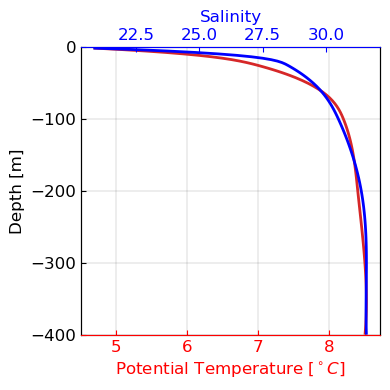

In [3]:
# Plot initial TS
fig0 = plt.figure(figsize=(4,4), tight_layout=True)

ax1 = fig0.add_subplot(111)
plt.grid(ls='-', c='k', alpha=.5, lw=0.2)
ax1.plot(t_ini,zprof,c='C3',lw=2)
ax1.set_ylim([-400, 0])
ax1.set_yticks([0,-100,-200,-300,-400])
#ax1.set_yticks([8.5,9,9.5,10])
ax1.set_xlabel(r'Potential Temperature [$^\circ C$]', size=12,color='r')
ax1.set_ylabel(r'Depth [m]',fontsize=12)
ax1.tick_params(direction='in', labelsize=12)
ax1.tick_params(axis='x', colors='r')

ax2=ax1.twiny()
ax2.plot(s_ini,zprof,c='b',lw=2)
#ax2.set_xlim([20, 35])
ax2.set_xlabel(r'Salinity', size=12,color='b')
ax2.tick_params(direction='in', labelsize=12)
ax2.tick_params(axis='x', colors='b')

ax2.spines['top'].set_color('b')
ax2.spines['bottom'].set_color('r')

In [ ]:
# Test

In [4]:
# Single wind event

externForcingCircle = 30*86400 # Forcing period in second
externForcingPeriod = 0.25*86400 # time interval between forcing field records
nt = int(externForcingCircle / externForcingPeriod)
model_time = np.linspace(0,externForcingCircle,nt+1);
up = 0*86400 / externForcingPeriod
down = 2.5*86400 / externForcingPeriod
ramp = 0.5*86400 / externForcingPeriod
taum = [0,.1,.3,.9,1.5] # maximum wind stress

zonal_wind_stress = np.zeros((len(taum),nt))

nf = int(down+ramp)
forcing = np.zeros((len(taum),nf))
# for i in range(0,len(taum)):
#     tau = taum[i]
#     for j in range(nt):
#         if (j <= up - 1) or (j >= down + ramp - 1):
#             zonal_wind_stress[i, j] = 0
#         elif j < up + ramp - 1:
#             zonal_wind_stress[i, j] = tau * (j - (up - 1)) / ramp
#         elif down - 1 < j < down + ramp - 1:
#             zonal_wind_stress[i, j] = tau * (down + ramp - 1 - j) / ramp
#         else:
#             zonal_wind_stress[i, j] = tau
for i in range(0,len(taum)):
    tau = taum[i]
    for j in range(nf):
        if j <= up - 1:
            forcing[i, j] = 0
        elif j < up + ramp - 1:
            forcing[i, j] = tau * (j - (up - 1)) / ramp
        elif j > down-1:
            forcing[i, j] = tau * (down + ramp - 1 - j) / ramp
        else:
            forcing[i, j] = tau

zonal_wind_stress[:,:nf] = forcing

#wind = np.concatenate((np.zeros((len(taum),1)), zonal_wind_stress), axis=1)

In [ ]:
model_time/86400

In [5]:
# Repeated wind event
rt = 1 # number of wind events

zonal_wind_stress[:,:nf*rt] = np.tile(forcing, rt)

wind = np.concatenate((np.zeros((len(taum),1)), zonal_wind_stress), axis=1)

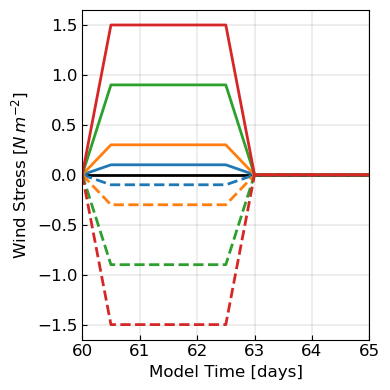

In [6]:
# Plot zonal wind stress
fig1 = plt.figure(figsize=(4,4), tight_layout=True)

ax1 = fig1.add_subplot(111)
ax1.grid(ls='-', c='k', alpha=.5, lw=0.2)

colors = ['k','C0','C1','C2','C3']
for i in range(len(taum)):
    if i==0:
        ax1.plot(model_time/86400+60,wind[i,:],c=colors[i],lw=2,label=str(taum[i]))
    else:
        ax1.plot(model_time/86400+60,wind[i,:],c=colors[i],lw=2,label=str(taum[i]))
        ax1.plot(model_time/86400+60,-wind[i,:],'--',c=colors[i],lw=2,label=str(-taum[i]))
#
#ax1.legend(title=r'',loc='best',fontsize=12)
ax1.set_xlim([60, 65])
#ax1.set_ylim([-.25, .25])
#ax1.set_yticks([0,0.3,0.6,0.9,1.2,1.5])
ax1.set_xlabel(r'Model Time [days]', size=12)
ax1.set_ylabel(r'Wind Stress [$N\,m^{-2}$]',fontsize=12)
ax1.tick_params(direction='in', labelsize=12)


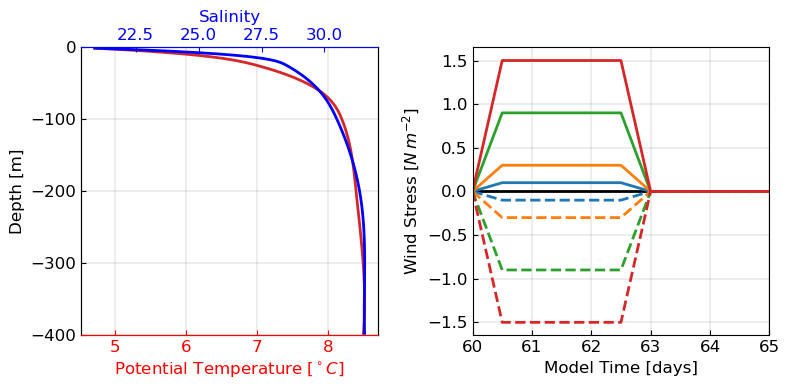

In [7]:
# Merge fig0&fig1
fig01 = plt.figure(figsize=(8,4), tight_layout=True)

# Initial Conditions
ax1 = fig01.add_subplot(121)
ax1.grid(ls='-', c='k', alpha=.5, lw=0.2)
ax1.plot(t_ini,zprof,c='C3',lw=2)
ax1.set_ylim([-400, 0])
ax1.set_yticks([0,-100,-200,-300,-400])
#ax1.set_yticks([8.5,9,9.5,10])
ax1.set_xlabel(r'Potential Temperature [$^\circ C$]', size=12,color='r')
ax1.set_ylabel(r'Depth [m]',fontsize=12)
ax1.tick_params(direction='in', labelsize=12)
ax1.tick_params(axis='x', colors='r')

ax2=ax1.twiny()
ax2.plot(s_ini,zprof,c='b',lw=2)
#ax2.set_xlim([20, 35])
ax2.set_xlabel(r'Salinity', size=12,color='b')
ax2.tick_params(direction='in', labelsize=12)
ax2.tick_params(axis='x', colors='b')

ax2.spines['top'].set_color('b')
ax2.spines['bottom'].set_color('r')

# Wind Forcing
ax3 = fig01.add_subplot(122)
ax3.grid(ls='-', c='k', alpha=.5, lw=0.2)

colors = ['k','C0','C1','C2','C3']
for i in range(len(taum)):
    if i==0:
        ax3.plot(model_time/86400+60,wind[i,:],c=colors[i],lw=2,label=str(taum[i]))
    else:
        ax3.plot(model_time/86400+60,wind[i,:],c=colors[i],lw=2,label=str(taum[i]))
        ax3.plot(model_time/86400+60,-wind[i,:],'--',c=colors[i],lw=2,label=str(-taum[i]))
#
#ax3.legend(title=r'',loc='best',fontsize=12)
ax3.set_xlim([60, 65])
#ax3.set_ylim([-.25, .25])
#ax3.set_yticks([0,0.3,0.6,0.9,1.2,1.5])
ax3.set_xlabel(r'Model Time [days]', size=12)
ax3.set_ylabel(r'Wind Stress [$N\,m^{-2}$]',fontsize=12)
ax3.tick_params(direction='in', labelsize=12)

In [8]:
# Model Domain and Bathymetry
path1 = '/Volumes/T7 Shield/MITgcm_jorgemontt/Qsg150_60d_notide/'
dist, depth, time, temp, sal, den, u, w = fun.along_fjord_state(path1,1)
t0 = 0
Temp = temp[t0,:,:]
S = sal[t0,:,:]
mask = (S==0)
# Temp[mask] = np.nan
# S[mask] = np.nan

In [ ]:
depth[-1]

Text(31, -380, 'Shelf')

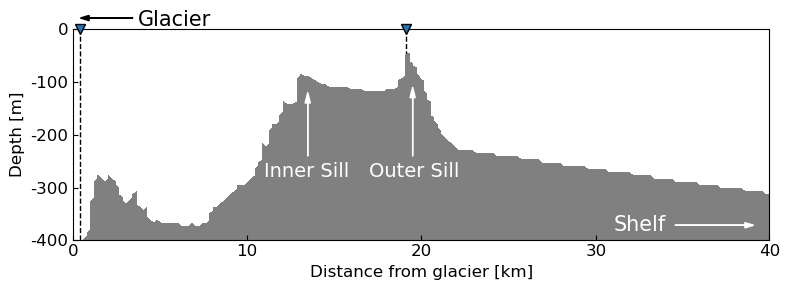

In [9]:
fig2 = plt.figure(figsize=(8,3), tight_layout=True)
ax = fig2.add_subplot(111)

# Topograhy
#
#ax.set_xlim([af15_msk[:,0].min(), af15_msk[:,0].max()]);
# Create a mask for NaNs (topography)
#topography_mask = np.isnan(data)

# Convert the mask to numerical values where '1' indicates topography
topo_numerical = np.where(mask, 1, np.nan)
ax.contourf(dist, depth, topo_numerical, levels=[0, 1], colors='grey',zorder=1.5)

# Sections
ax.plot([dist[2],dist[95]],[-1,-1],'v',ms=7,mfc='C0',mec='k',clip_on=False,zorder=3)
ax.axvline(x=dist[2], color='k',ls='--',lw=1,zorder=1)
ax.axvline(x=dist[95], color='k',ls='--',lw=1,zorder=1)

ax.tick_params(direction='in', labelsize=12)
ax.set_ylim([depth[-1],depth[0]])
ax.set_yticks([depth[0], -100, -200, -300, depth[-1]])
ax.set_yticklabels(['0','-100','-200','-300','-400'])
ax.set_xticks([dist[0],10,20,30,dist[-1]])
ax.set_xticklabels(['0','10','20','30','40'])
ax.set_xlabel(r'Distance from glacier [km]',fontsize=12)
ax.set_ylabel(r'Depth [m]',fontsize=12)

# Annotation
# #ax1.set_title('(b)', loc='left', size=12, weight='bold')
ax.arrow(3.5, 20, -2.5, 0, head_width=10, head_length=.5, fc='k',clip_on=False)
ax.text(3.8,5,'Glacier',fontsize=15,c='k')

ax.arrow(13.5, -240, 0, 100, head_width=0.3, head_length=20, color='w',ec='w',fc='w',clip_on=False,zorder=2)
ax.text(11,-280,'Inner Sill',fontsize=14,c='w')

ax.arrow(19.5, -240, 0, 110, head_width=0.3, head_length=20, color='w',ec='w',fc='w',clip_on=False,zorder=2)
ax.text(17,-280,'Outer Sill',fontsize=14,c='w')

ax.arrow(34.5, -370, 4, 0, head_width=10, head_length=0.5, color='w',ec='w',fc='w',clip_on=False,zorder=2)
ax.text(31,-380,'Shelf',fontsize=15,c='w')


In [10]:
#fig_path ="/home/1959/Jupyter_Figs/FjordModeling/JorgeMontt"
fig_path ="/Users/weiyangbao/Documents/Figures/FjordModeling/JorgeMontt/Model_Setup/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

fig01.savefig(fig_path + 'IniCond_Wind.png', dpi=300, bbox_inches='tight')
# fig0.savefig(fig_path + 'Initial_Condition.png', dpi=300, bbox_inches='tight')
# fig1.savefig(fig_path + 'Wind_Forcing.png', dpi=300, bbox_inches='tight')
# fig2.savefig(fig_path + 'Fjord_Domain.png', dpi=300, bbox_inches='tight')